In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 0부터 100까지 0.1씩 증가한 1000개의 시계열 데이터
x = np.arange(0, 100, 0.1)
y = 0.5*np.sin(2*x) - np.cos(x/2.0)

# RNN 입력에 필수적인 (batch size, time steps, imput_dim) 3차원 텐서 형태의 입력 데이터로 쉽게 만들기 위해서 reshape(-1, 1) 사용하여 (1000, 1) 행렬로 바꾸어줌
seq_data = y.reshape(-1,1)

print(seq_data.shape)
print(seq_data[:5])

(1000, 1)
[[-1.        ]
 [-0.89941559]
 [-0.80029499]
 [-0.70644984]
 [-0.62138853]]


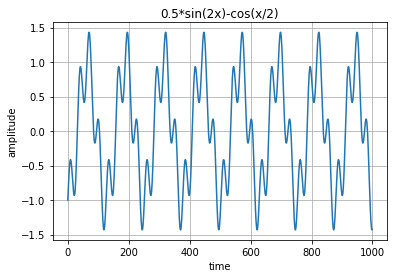

In [3]:
plt.title('0.5*sin(2x)-cos(x/2)')
plt.xlabel('time')
plt.ylabel('amplitude')
plt.plot(seq_data)
plt.grid()
plt.show()

In [7]:
def seq2dataset(seq, window, horizon):
  X = [] # 입력 데이터를 저장하는 list
  Y = [] # 정답 데이터를 저장하는 list

  for i in range(len(seq)-(window+horizon)+1):
    x = seq[i:(i+window)]
    y = (seq[i+window+horizon-1])

    X.append(x)
    Y.append(y)

  return np.array(X), np.array(Y)

w = 20 # window size
h = 1 # horizon factor

X, Y = seq2dataset(seq_data, w, h)
print(X.shape, Y.shape)

(980, 20, 1) (980, 1)


In [8]:
split_ratio = 0.8
split = int(split_ratio*len(X))

x_train = X[0:split]
y_train = Y[0:split]

x_test = X[split:]
y_test = Y[split:]

print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(784, 20, 1) (784, 1) (196, 20, 1) (196, 1)


In [9]:
model = Sequential()

# SimpleRNN 계층에 tanh를 활성화 함수로 가지는 노드 수 128개
model.add(SimpleRNN(units=128, activation='tanh', input_shape=x_train[0].shape))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 128)               16640     
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 16,769
Trainable params: 16,769
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

hist = model.fit(x_train, y_train, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
25/25 [==============================] - 3s 37ms/step - loss: 0.0719 - mae: 0.1740 - val_loss: 0.0075 - val_mae: 0.0720
Epoch 2/100
25/25 [==============================] - 0s 17ms/step - loss: 0.0025 - mae: 0.0385 - val_loss: 0.0013 - val_mae: 0.0292
Epoch 3/100
25/25 [==============================] - 0s 13ms/step - loss: 9.1572e-04 - mae: 0.0244 - val_loss: 6.2062e-04 - val_mae: 0.0196
Epoch 4/100
25/25 [==============================] - 0s 12ms/step - loss: 5.2576e-04 - mae: 0.0182 - val_loss: 3.5003e-04 - val_mae: 0.0142
Epoch 5/100
25/25 [==============================] - 0s 13ms/step - loss: 3.4475e-04 - mae: 0.0148 - val_loss: 2.4276e-04 - val_mae: 0.0119
Epoch 6/100
25/25 [==============================] - 0s 13ms/step - loss: 1.6689e-04 - mae: 0.0100 - val_loss: 1.1381e-04 - val_mae: 0.0080
Epoch 7/100
25/25 [==============================] - 0s 12ms/step - loss: 1.3566e-04 - mae: 0.0092 - val_loss: 1.0606e-04 - val_mae: 0.0084
Epoch 8/100
25/25 [=================

In [12]:
pred = model.predict(x_test)
print(pred.shape)

7/7 [==============================] - 0s 5ms/step
(196, 1)


In [13]:
rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx: ', rand_idx)
print('pred: ', pred.flatten()[rand_idx])
print('label: ', y_test.flatten()[rand_idx])

rand_idx = np.random.randint(0, len(y_test), size=5)

print('random idx: ', rand_idx)
print('pred: ', pred.flatten()[rand_idx])
print('label: ', y_test.flatten()[rand_idx])

random idx:  [ 34 169 105  20 100]
pred:  [ 0.04808218 -0.04200736 -0.302455    1.4313422  -0.8402656 ]
label:  [ 0.04488751 -0.04422586 -0.30330364  1.43168821 -0.83954079]
random idx:  [140  65 103  46 167]
pred:  [ 1.1510208  -1.2852647  -0.5652519   0.08669824 -0.12784667]
label:  [ 1.14698488 -1.28569752 -0.56466116  0.08494103 -0.12930483]


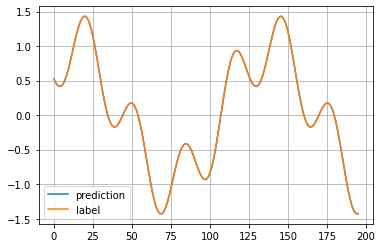

In [14]:
plt.plot(pred, label='prediction')
plt.plot(y_test, label='label')
plt.grid()
plt.legend(loc='best')
plt.show()